In [30]:
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr, stringify_expr
from sympy.parsing.sympy_parser import standard_transformations
from sympy.parsing.sympy_parser import implicit_multiplication_application
from sympy import Symbol
from sympy import *
from numpy import *
from sympy.functions.elementary.exponential import exp
import math
import string
import matplotlib.pyplot as plt

transformations = (standard_transformations + (implicit_multiplication_application,))

def is_number(num):
    try:
        float(num)
        if float(num) >= 0 and float(num) <= 100:
            return True
        else:
            print ("No es un numero positivo")
            return False
    except ValueError:
        print ("No es un numero")
        return False

def eval_pars(eq_str, val):
    #print ("eval_pars .... inicio")
    x = Symbol('x')
    e = Symbol('e')
    try:
        ecuacion = parse_expr(eq_str, transformations = transformations)
        syms = list(ecuacion.free_symbols)
    #   print ("eval_pars .... fin")
        return ecuacion.subs({x:val, e:2.7182818284590452353602874713527})
    except:
        print ("No escribio la ecuacion correctamente.")
    #    print ("eval_pars .... fin")
    return False

#by Baruc
def eval_parse(eq_str, val):
    #print ("eval_parse .... inicio")
    try:
        x = val
        return eval(eq_str)
    except:
        print ("No escribio la ecuacion correctamente.")
    #    print ("eval_parse .... fin")
    return False

def val_x1_xu(eq_str, x1, xu):
    fx1 = eval_parse(eq_str, x1)
    fxu = eval_parse(eq_str, xu)
    print("f(X1) = ", fx1)
    print("f(Xu) = ", fxu)
    fx1_xu = fx1 * fxu
    if fx1 > 0 and fxu > 0:
        print ("La raiz no se encuentra en este rango.")
        print ("f(X1) = Positivo")
        print ("f(XU) = Positivo")
        return False
    elif fx1 < 0 and fxu < 0:
        print ("La raiz no se encuentra en este rango.")
        print ("f(X1) = Negativo")
        print ("f(XU) = Negativo")
        return False
    elif fx1 < 0 and fxu > 0:
        return 1
    elif fx1 > 0 and fxu < 0:
        return 2

def validacion(eq_str, x1, xu, ea):
    while eval_parse(eq_str, 1) == False:
        eq_str = input("Introduce la equacion: ")
    while val_x1_xu(eq_str, x1, xu) == False:
        x1 = input("El limite inferior de la seccion (X1): ")
        xu = input("El limite superior de la seccion (Xu): ")
    if val_x1_xu(eq_str, x1, xu) == 2:
        print ("Se han intercambiado los valores de X1 y Xu.")
        x1,xu = xu,x1
    while is_number(ea) == False:
        ea = input("El error deseado (Ea): ")
    return eq_str,x1,xu,ea

def error_aproximado(xr_old, xr_new):
    try:
        if xr_new == 0:
            error = 100
        else:
            error = abs((((xr_new - xr_old)/ xr_new)*100))
        return error
    except:
        print ("Error en la aproximacion")
        return 0


def reemplazo(eq_str, xr_new, x1, xu):
    fx1=eval_parse(eq_str, x1)
    fxrnew=eval_parse(eq_str, xr_new)
    fx1_xrnew = fx1 * fxrnew
    if fx1_xrnew > 0:
        x1 = xr_new
        return x1, xu
    elif fx1_xrnew < 0:
        xu = xr_new
        return x1, xu
    else:
        return x1, xu
    
def grafica(eq_str, x1, xu):
    xl = [i for i in range(x1, xu)]
    #yl = [eval_pars(eq_str, x) for x in xl]
    yl = [eval_parse(eq_str, x) for x in xl]
    plt.plot(xl, yl)
    plt.show()

def graficas(eq_strs, x1, xu):
    colors = ['r','g','b']
    xl = [i for i in range(x1, xu)]
    for eq_str, col in zip(eq_strs, colors):
        yl = [eval_parse(eq_str, x) for x in xl]
        plt.plot(xl, yl, col)
    plt.show()

def biseccion():
    # Input ecuacion
    eq_str = input("Introduce la equacion: ")
    #eq_str = eq_str.replace("e", repr(e))
    #print (eq_str)
    # Definicion del contador iteracion para medir al infinito
    iteracion = 0
    
    # Definicion de los rangos X1 y Xu
    x1 = float(input("El limite inferior de la seccion (X1): "))
    xu = float(input("El limite superior de la seccion (Xu): "))
    
    # Definicion del valor deseado
    ed = (input("El error deseado (Ed): "))
    
    #Validacion del error deseado, con 0 se itera de manera indefinida
    if ed == 0:
        ed = 0.000001
    
    # LLamada a la funcion de validacion para las variables
    eq_str,x1,xu,ed = validacion(eq_str, x1, xu, ed)
   
    # Definicion de la funciones f(X1) y f(Xu)
    fx1 = eval_parse(eq_str, x1)
    fxu = eval_parse(eq_str, xu)
    print(fx1, fxu)

    # Redefinicion de el tipo de variable de los errores
    ed = float(ed)
    ea = float(100)
    
    # Definicion de las variables Xr y f(Xr)
    xr_old = 0
    xr_new = float((float(x1)+float(xu))/2)
    fxr = eval_parse(eq_str, xr_new)
    
    # Validacion de las reglas para X1 y Xu
    x1,xu = reemplazo(eq_str, xr_new, x1, xu)
    
    # Calculo del error aproximado
    ea = error_aproximado(xr_old, xr_new)
    
    # Incrementa el conteo de la iteracion
    iteracion += 0
    
    # Validacion de raices en f(X1), f(Xu) y f(Xr)
    if fx1 == 0:
        ea = 0
        xr_new = x1
        print("\t[Datos - Iteracion {}]\nX1 = {}\tXu= {}\nXr = {}\t Ea = {}%".format(iteracion, x1, xu, xr_new, ea))
        return 1
    elif fxu == 0:
        ea = 0
        xr_new = xu
        print("\t[Datos - Iteracion {}]\nX1 = {}\tXu= {}\nXr = {}\t Ea = {}%".format(iteracion, x1, xu, xr_new, ea))
        return 2
    elif fxr == 0:
        ea = 0
        print("\t[Datos - Iteracion {}]\nX1 = {}\tXu= {}\nXr = {}\t Ea = {}%".format(iteracion, x1, xu, xr_new, ea))
        return 3
    
    # Impresion de los datos
    print("\t[Datos - Iteracion {}]\nX1 = {}\tXu= {}\nXr = {}\t Ea = {}%".format(iteracion, x1, xu, xr_new, ea))
        
    while (ea >= ed):
        xr_old = xr_new
        xr_new = (float(x1)+float(xu))/2
        ea = error_aproximado(xr_old, xr_new)
        iteracion += 1
        print("\n\t[Datos - Iteracion {}]\nX1 = {}\tXu= {}\nXr = {}\t Ea = {}%".format(iteracion, x1, xu, xr_new, ea))
        x1,xu = reemplazo(eq_str, xr_new, x1, xu)
        fxr = eval_parse(eq_str, xr_new)
        if fxr == 0:
            ea = 0
            return 3.1
    return 0    

In [27]:
#si se tienen ambas raices en una cuadratica en el rango, no puede encontrarlas (Hay que atrapar solo una raíz)

biseccion()

Introduce la equacion: e**(-x)-x + sin(x)+10
2.718281828459045**(-x)-x + sin(x)+10
El limite inferior de la seccion (X1): 0
El limite superior de la seccion (Xu): 15
El error deseado (Ed): 0.1
f(X1) =  11
f(Xu) =  -4.349711853940563
f(X1) =  11
f(Xu) =  -4.349711853940563
Se han intercambiado los valores de X1 y Xu.
-4.349711853940563 11
	[Datos - Iteracion 0]
X1 = 15.0	Xu= 7.5
Xr = 7.5	 Ea = 100.0%

	[Datos - Iteracion 1]
X1 = 15.0	Xu= 7.5
Xr = 11.25	 Ea = 33.33333333333333%

	[Datos - Iteracion 2]
X1 = 11.25	Xu= 7.5
Xr = 9.375	 Ea = 20.0%

	[Datos - Iteracion 3]
X1 = 11.25	Xu= 9.375
Xr = 10.3125	 Ea = 9.090909090909092%

	[Datos - Iteracion 4]
X1 = 10.3125	Xu= 9.375
Xr = 9.84375	 Ea = 4.761904761904762%

	[Datos - Iteracion 5]
X1 = 9.84375	Xu= 9.375
Xr = 9.609375	 Ea = 2.4390243902439024%

	[Datos - Iteracion 6]
X1 = 9.84375	Xu= 9.609375
Xr = 9.7265625	 Ea = 1.2048192771084338%

	[Datos - Iteracion 7]
X1 = 9.7265625	Xu= 9.609375
Xr = 9.66796875	 Ea = 0.6060606060606061%

	[Datos - It

0

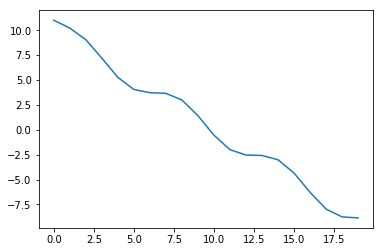

In [26]:
grafica("e**(-x)-x + sin(x)+10", 0, 20)

* Hacer validacion en caso de el nivel de la ecuacion sea par:
    Ejemplo:
        -> x^0, x^2, x^2n
> Esto se hace para revisar si tiene raices reales con intercepcion en el eje x

In [29]:
x = 9.71923828125
eval_parse("e**(-x)-x + sin(x)+10", x)

-0.0094016067644062673

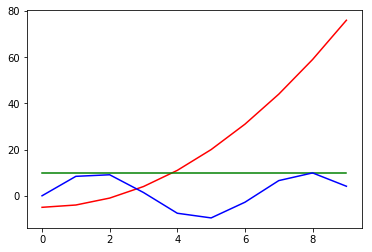

In [36]:
graficas(["x**2 - 5", "10", "10*sin(x)"], 0, 10)